# **Line Charts**


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas


In [3]:
!pip install matplotlib
!pip install seaborn

#### Download the dataset


In [4]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2025-06-13 10:53:37--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  58.5MB/s    in 2.6s    

2025-06-13 10:53:40 (58.5 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



#### Step 2: Import necessary libraries and load the dataset


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### Load the data


In [6]:
df = pd.read_csv("survey-data.csv")


#### Display the first few rows to understand the structure of the data


In [7]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


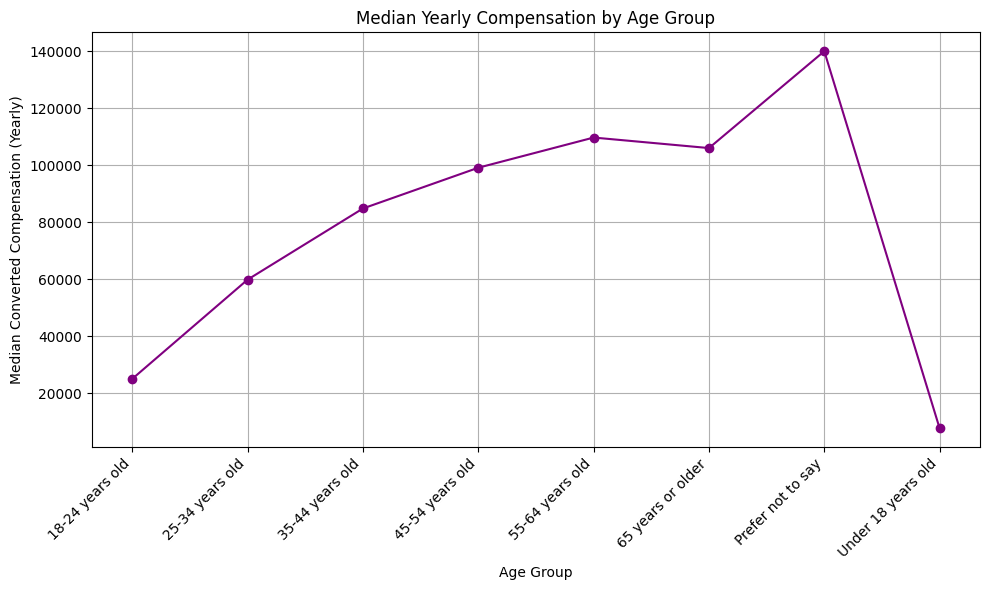

In [10]:
# Step 1: Drop missing compensation or age
df_filtered = df.dropna(subset=['ConvertedCompYearly', 'Age']).copy()

# Step 3: Group by age and compute median compensation
median_income = df_filtered.groupby('Age')['ConvertedCompYearly'].median().reset_index()

# Step 4: Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(median_income['Age'], median_income['ConvertedCompYearly'],
         marker='o', linestyle='-', color='purple')
plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Converted Compensation (Yearly)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


/tmp/ipykernel_2722/2442420198.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_jobsat = df_exp.groupby('ExperienceGroup')['JobSatPoints_6'].sum().reset_index()


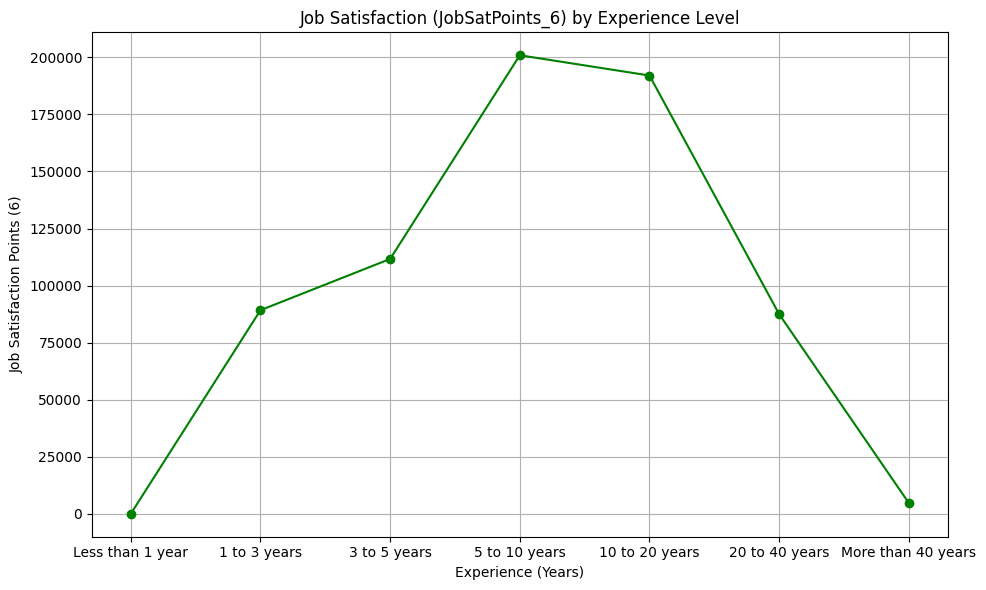

In [21]:
# Step 1: Filter and clean
df_exp = df[['YearsCodePro', 'JobSatPoints_6']].copy()

# Convert YearsCodePro to numeric, coercing errors (some entries might be strings like "Less than 1 year")
df_exp['YearsCodePro'] = pd.to_numeric(df_exp['YearsCodePro'], errors='coerce')

# Remove rows with NaN in either column
df_exp = df_exp.dropna(subset=['YearsCodePro', 'JobSatPoints_6'])

# Replace 'I prefer not to say' in JobSatPoints_6 if needed (similar to before)
df_exp['JobSatPoints_6'] = pd.to_numeric(df_exp['JobSatPoints_6'], errors='coerce')
df_exp = df_exp.dropna(subset=['JobSatPoints_6'])

# Step 2: Define bins for experience (you can adjust these ranges)
bins = [0, 1, 3, 5, 10, 20, 40, 100]
labels = ['Less than 1 year',
    '1 to 3 years',
    '3 to 5 years',
    '5 to 10 years',
    '10 to 20 years',
    '20 to 40 years',
    'More than 40 years']

df_exp['ExperienceGroup'] = pd.cut(df_exp['YearsCodePro'], bins=bins, labels=labels, right=False)

# Step 3: Group by ExperienceGroup and calculate sum of JobSatPoints_6
sum_jobsat = df_exp.groupby('ExperienceGroup')['JobSatPoints_6'].sum().reset_index()

# Step 4: Plot
plt.figure(figsize=(10,6))
plt.plot(sum_jobsat['ExperienceGroup'], sum_jobsat['JobSatPoints_6'], marker='o', linestyle='-', color='green')
plt.title('Job Satisfaction (JobSatPoints_6) by Experience Level')
plt.xlabel('Experience (Years)')
plt.ylabel('Job Satisfaction Points (6)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3: Trends in Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.


/tmp/ipykernel_2722/1333552458.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_comp = df_exp_comp.groupby('ExperienceGroup')['ConvertedCompYearly'].median().reset_index()


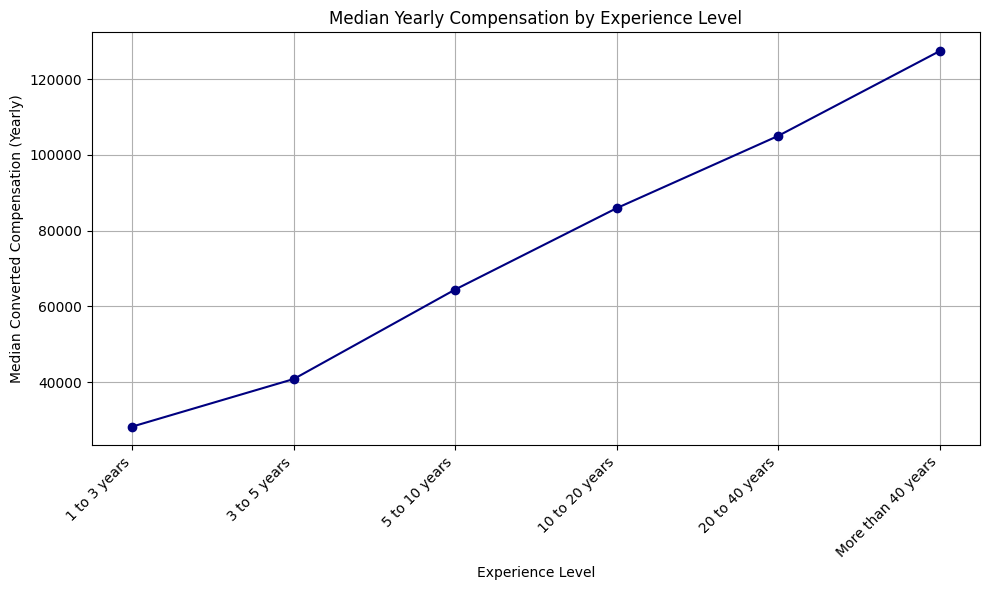

In [14]:
# Step 1: Select and clean relevant columns
df_exp_comp = df[['YearsCodePro', 'ConvertedCompYearly']].copy()

# Convert YearsCodePro to numeric, coercing errors (handles "Less than 1 year" etc.)
df_exp_comp['YearsCodePro'] = pd.to_numeric(df_exp_comp['YearsCodePro'], errors='coerce')
df_exp_comp['ConvertedCompYearly'] = pd.to_numeric(df_exp_comp['ConvertedCompYearly'], errors='coerce')

# Drop rows with missing values
df_exp_comp = df_exp_comp.dropna(subset=['YearsCodePro', 'ConvertedCompYearly'])

# Step 2: Define experience bins and descriptive labels
bins = [0, 1, 3, 5, 10, 20, 40, 100]
labels = [
    'Less than 1 year',
    '1 to 3 years',
    '3 to 5 years',
    '5 to 10 years',
    '10 to 20 years',
    '20 to 40 years',
    'More than 40 years'
]

df_exp_comp['ExperienceGroup'] = pd.cut(df_exp_comp['YearsCodePro'], bins=bins, labels=labels, right=False)

# Step 3: Calculate median compensation by experience group
median_comp = df_exp_comp.groupby('ExperienceGroup')['ConvertedCompYearly'].median().reset_index()

# Step 4: Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(median_comp['ExperienceGroup'], median_comp['ConvertedCompYearly'],
         marker='o', linestyle='-', color='navy')

plt.title('Median Yearly Compensation by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Median Converted Compensation (Yearly)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 2.Line Chart of Job Satisfaction (`JobSatPoints_5`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_5`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


/tmp/ipykernel_2722/1576228565.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_jobsat = df_exp.groupby('ExperienceGroup')['JobSat'].sum().reset_index()


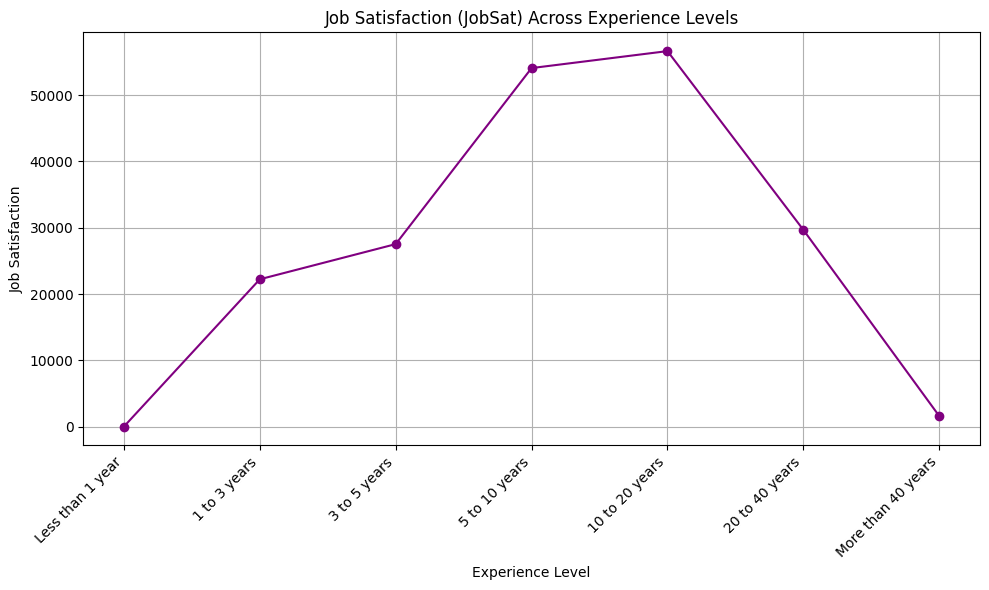

In [20]:
# Prepare DataFrame with relevant columns
df_exp = df[['YearsCodePro', 'JobSat']].copy()

# Convert to numeric, coercing errors
df_exp['YearsCodePro'] = pd.to_numeric(df_exp['YearsCodePro'], errors='coerce')
df_exp['JobSat'] = pd.to_numeric(df_exp['JobSat'], errors='coerce').round()

# Drop rows with missing values in these columns
df_exp = df_exp.dropna(subset=['YearsCodePro', 'JobSat'])

# Define experience bins and descriptive labels
bins = [0, 1, 3, 5, 10, 20, 40, 100]
labels = [
    'Less than 1 year',
    '1 to 3 years',
    '3 to 5 years',
    '5 to 10 years',
    '10 to 20 years',
    '20 to 40 years',
    'More than 40 years'
]

df_exp['ExperienceGroup'] = pd.cut(df_exp['YearsCodePro'], bins=bins, labels=labels, right=False)

# Group by experience group and calculate median JobSat
median_jobsat = df_exp.groupby('ExperienceGroup')['JobSat'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(median_jobsat['ExperienceGroup'], median_jobsat['JobSat'], marker='o', linestyle='-', color='purple')
plt.title('Job Satisfaction (JobSat) Across Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Job Satisfaction')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()